In [1]:
import numpy as np
import pandas as pd
file_path=r"E:\My new World\Ineuron\ML Projects\ML_Housing_project_2\housing\artifact\data_ingestion\2023-01-11-08-05-02\ingested_data\train\housing.csv"

In [2]:
df=pd.read_csv(file_path)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND
1,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND
2,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN
3,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN
4,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND


In [4]:
df.shape

(16512, 10)

In [5]:
x,y=df.drop(columns=["median_house_value"],axis=1),df[["median_house_value"]]

In [6]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,INLAND
1,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,INLAND
2,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,<1H OCEAN
3,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,<1H OCEAN
4,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,INLAND
...,...,...,...,...,...,...,...,...,...
16507,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,INLAND
16508,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,INLAND
16509,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,<1H OCEAN
16510,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,INLAND


In [7]:
x.shape

(16512, 9)

In [8]:
y.shape

(16512, 1)

In [9]:
x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
numerical_columns=x.drop(columns=['ocean_proximity'],axis=1)
numerical_columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719
1,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583
2,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875
3,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136
4,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361
...,...,...,...,...,...,...,...,...
16507,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382
16508,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679
16509,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118
16510,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625


In [12]:
simple_imputer=SimpleImputer(strategy="median")

In [13]:
simple_imputer.fit_transform(numerical_columns)

array([[-121.26  ,   37.88  ,   42.    , ...,  256.    ,   93.    ,
           3.1719],
       [-121.64  ,   37.85  ,   22.    , ...,  967.    ,  320.    ,
           4.4583],
       [-118.15  ,   33.95  ,   35.    , ..., 1592.    ,  614.    ,
           2.7875],
       ...,
       [-118.27  ,   34.17  ,   48.    , ...,  825.    ,  269.    ,
           5.5118],
       [-121.33  ,   37.98  ,   36.    , ..., 1746.    ,  544.    ,
           3.4625],
       [-118.4   ,   34.    ,   37.    , ...,  751.    ,  259.    ,
           5.444 ]])

In [14]:
df=simple_imputer.transform(numerical_columns)

In [15]:
simple_imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [16]:
simple_imputer.statistics_

array([-118.48  ,   34.25  ,   29.    , 2129.    ,  436.    , 1168.    ,
        411.    ,    3.5341])

In [17]:
x.latitude.median()

34.25

In [18]:
x.ocean_proximity

0           INLAND
1           INLAND
2        <1H OCEAN
3        <1H OCEAN
4           INLAND
           ...    
16507       INLAND
16508       INLAND
16509    <1H OCEAN
16510       INLAND
16511    <1H OCEAN
Name: ocean_proximity, Length: 16512, dtype: object

In [19]:
x.ocean_proximity.value_counts()

<1H OCEAN     7324
INLAND        5213
NEAR OCEAN    2126
NEAR BAY      1844
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
simple_imputer=SimpleImputer(strategy="most_frequent")

In [21]:
categorical=x[['ocean_proximity']]

In [22]:
simple_imputer.fit_transform(categorical)

array([['INLAND'],
       ['INLAND'],
       ['<1H OCEAN'],
       ...,
       ['<1H OCEAN'],
       ['INLAND'],
       ['<1H OCEAN']], dtype=object)

In [23]:
simple_imputer.statistics_

array(['<1H OCEAN'], dtype=object)

In [24]:
simple_imputer.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [25]:
class FeatureGenerator():
    
    def __init__(self,strategy="median"):
        self.strategy=strategy

    def fit(self,x):
        self.features_=x.columns
        self.statistics_=[]
        for column in x.columns:
            self.statistics_.append(x[column].median())

    def transform(self,x:pd.DataFrame):
        for idx,column in enumerate(x.columns):
            x[column].fillna(self.statistics_[idx])
        return x            
    def fit_transform(self,x):
        self.fit(x)
        self.transform(x)

In [26]:
enumerate(x.columns)

In [27]:
from sklearn.base import BaseEstimator,TransformerMixin

In [28]:
from housing.exception import HousingException
from housing.constant import *

In [29]:
class FeatureGenerator(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True,
                    total_rooms_ix=3,
                    population_ix=5,
                    households_ix=5,
                    total_bedrooms_ix=4,
                    columns=None):
        """
        Feature Generator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms column
        population_ix: int index number of population column
        households_ix: int index number of households column
        total_bedrooms_ix: int index number of bedrooms column
                
        """
        try:
            self.columns=columns
            if self.columns is not None:
                total_rooms_ix=self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix=self.columns.index(COLUMN_POPULATION)
                households_ix=self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix=self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room=add_bedrooms_per_room
            self.total_rooms_ix=total_rooms_ix
            self.population_ix=population_ix
            self.households_ix=households_ix
            self.total_bedrooms_ix=total_bedrooms_ix

        except Exception as e:
            raise HousingException(e,sys) from e
    def fit(self,x,y=None):
        return self

    def transform(self,x,y=None):
        try:
            room_per_household=x[:,self.total_rooms_ix]/x[:,self.households_ix]
            population_per_household=x[:,self.population_ix]/x[:,self.households_ix]

            if self.add_bedrooms_per_room:
                bedrooms_per_room=x[:,self.total_bedrooms_ix]/x[:,self.total_rooms_ix]
                generated_feature=np.c_[x,room_per_household,population_per_household,bedrooms_per_room]
            else:
                generated_feature=np.c_[x,room_per_household,population_per_household]
            
            return generated_feature
        except Exception as e:
            raise HousingException(e,sys) from e
    

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [31]:
num_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="median")),
    ('feature_generator',FeatureGenerator()),
    ('scaling',StandardScaler()),
])

In [32]:
cat_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="most_frequent")),
    ('OneHotEncoder',OneHotEncoder()),
    ('scaling',StandardScaler(with_mean=False))
])

In [33]:
from sklearn.compose import ColumnTransformer

In [34]:
numerical_columns_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [35]:
categorical_columns_names=['ocean_proximity']

In [36]:
preprocessing=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_columns_names),
    ('cat_pipeline',cat_pipeline,categorical_columns_names)
])

In [37]:
train_df=r"E:\My new World\Ineuron\ML Projects\ML_Housing_project_2\housing\artifact\data_ingestion\2023-01-11-08-05-02\ingested_data\train\housing.csv"
train_df=pd.read_csv(train_df)
train_df_t=train_df

In [38]:
preprocessing.fit_transform(train_df)

array([[-0.84790302,  1.0606902 ,  1.06500612, ...,  0.        ,
         0.        ,  0.        ],
       [-1.03770326,  1.04660645, -0.52686326, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7054621 , -0.78428172,  0.50785184, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.64552518, -0.68100085,  1.54256693, ...,  0.        ,
         0.        ,  0.        ],
       [-0.88286623,  1.10763605,  0.5874453 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58059352, -0.7608088 ,  0.66703877, ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
import dill

In [40]:
with open('preprocessing.pkl','wb') as prep_file:
    dill.dump(preprocessing,prep_file)

In [41]:
with open('preprocessing.pkl','rb') as preprocessed:
   preprocessed_loaded_obj=dill.load(preprocessed)

In [42]:
test=r"E:\My new World\Ineuron\ML Projects\ML_Housing_project_2\housing\artifact\data_ingestion\2023-01-11-08-05-02\ingested_data\test\housing.csv"
test_df=pd.read_csv(test)
test_df.shape
test_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.42,34.29,34.0,1489.0,326.0,1389.0,313.0,3.4821,160300.0,<1H OCEAN
1,-118.30,34.04,37.0,1470.0,399.0,1579.0,390.0,2.0060,150000.0,<1H OCEAN
2,-117.87,33.76,37.0,4943.0,851.0,2164.0,788.0,4.1071,311300.0,<1H OCEAN
3,-118.05,33.94,34.0,495.0,120.0,527.0,130.0,1.9453,149000.0,<1H OCEAN
4,-117.18,34.07,7.0,1347.0,301.0,799.0,276.0,2.9485,112500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
4123,-118.29,34.25,19.0,1988.0,594.0,1399.0,527.0,2.4727,175000.0,<1H OCEAN
4124,-119.29,36.54,18.0,2581.0,628.0,2732.0,592.0,1.8429,58300.0,INLAND
4125,-121.75,38.55,26.0,4802.0,950.0,2199.0,939.0,3.7452,227700.0,INLAND
4126,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964,112500.0,INLAND


In [43]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND
1,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND
2,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN
3,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN
4,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,INLAND
16508,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,INLAND
16509,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,<1H OCEAN
16510,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,INLAND


In [44]:
train_df=preprocessed_loaded_obj.transform(train_df)
train_df

array([[-0.84790302,  1.0606902 ,  1.06500612, ...,  0.        ,
         0.        ,  0.        ],
       [-1.03770326,  1.04660645, -0.52686326, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7054621 , -0.78428172,  0.50785184, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.64552518, -0.68100085,  1.54256693, ...,  0.        ,
         0.        ,  0.        ],
       [-0.88286623,  1.10763605,  0.5874453 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58059352, -0.7608088 ,  0.66703877, ...,  0.        ,
         0.        ,  0.        ]])

In [45]:
x=train_df
y=np.array(train_df_t.median_house_value)
x

array([[-0.84790302,  1.0606902 ,  1.06500612, ...,  0.        ,
         0.        ,  0.        ],
       [-1.03770326,  1.04660645, -0.52686326, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7054621 , -0.78428172,  0.50785184, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.64552518, -0.68100085,  1.54256693, ...,  0.        ,
         0.        ,  0.        ],
       [-0.88286623,  1.10763605,  0.5874453 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58059352, -0.7608088 ,  0.66703877, ...,  0.        ,
         0.        ,  0.        ]])

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr=LinearRegression()

In [48]:
lr.fit(x,y)

LinearRegression()

In [49]:
lr.coef_

array([-5.82986373e+04, -5.95150476e+04,  1.37253104e+04, -5.41650950e+03,
        3.52927784e+03, -3.78569129e+04,  4.52786812e+04,  7.36964930e+04,
        1.19319863e+04, -3.92620338e+07,  8.74349737e+03,  5.59267057e+13,
        5.23236997e+13,  1.95863565e+12,  3.54568775e+13,  3.77038966e+13])

In [50]:
lr.intercept_

-112573004340103.36

In [51]:
y_hat=lr.predict(x)

In [52]:
import matplotlib.pyplot as plt

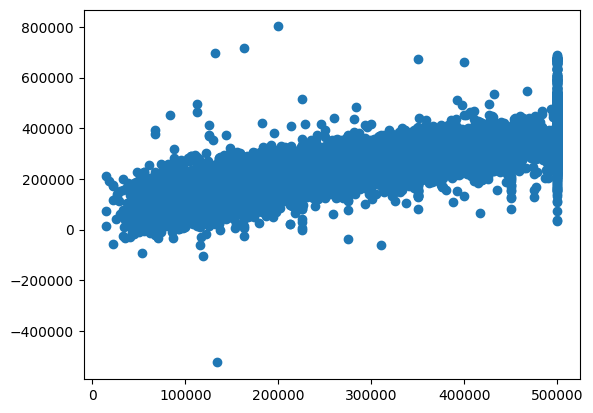

In [53]:
plt.plot(y,y_hat,'o')

In [54]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y,y_hat)

0.6546923674403153